## Lab 6 - Model comparison
<br>
Dominik Czyżyk<br>
401858<br>
czwartek, 9:30

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Generate data

In [2]:
F = 7
L = 6
N = (L+F)*100

model_data1=CmdStanModel(stan_file='code_1.stan')

data1 = model_data1.sample(data={"N":N},
                           iter_sampling=1,
                           iter_warmup=0,
                           chains=1,
                           fixed_param=True,
                           seed=26042023,
                           )
data1_pd = data1.draws_pd()
data1_pd = data1_pd.iloc[:,3:]
data1_pd.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.264602,-0.024155,-0.78435,-1.74902,-1.29113,0.164387,-0.253011,0.38029,0.364704,-0.074319,...,-0.27021,1.31465,0.206146,-0.605663,-0.49761,1.46673,9.45623,1.51678,0.011568,-1.37937


In [3]:
model_data2=CmdStanModel(stan_file='code_2.stan')

data2 = model_data2.sample(data={"N":N},
                           iter_sampling=1,
                           iter_warmup=0,
                           chains=1,
                           fixed_param=True,
                           seed=26042023,
                           )
data2_pd = data2.draws_pd()
data2_pd.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.264602,-0.697318,-0.199312,-0.766254,1.70363,-1.29113,0.047581,-1.41489,...,2.05828,-7.57974,2.74265,1.70965,1.13546,3.0942,0.867884,2.3081,1.78676,-2.01181


### Comparison of above data for both models

In [4]:
original_model=CmdStanModel(stan_file='code_3.stan')
original_data1 = original_model.sample(data={"N":N, "y":data1_pd.iloc[0,:]},
                           seed=26042023)

student_model=CmdStanModel(stan_file='code_4.stan')
student_data1 = student_model.sample(data={"N":N, "y":data1_pd.iloc[0,:]},
                           seed=26042023)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)





chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


#### Create arviz InferenceData

In [5]:
original1_az = az.from_cmdstanpy(
    posterior=original_data1,
)
student1_az = az.from_cmdstanpy(
    posterior=student_data1,
)

#### Comparison

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student_1,0,-1964.633873,4.962786,0.000000,1.0,41.617132,0.000000,False,log
original_1,1,-2678.692694,63.459429,714.058821,0.0,219.462343,191.429659,True,log


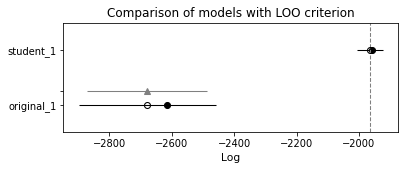

In [6]:
loo_diff = az.compare(compare_dict={"original_1": original1_az, "student_1": student1_az}, ic="loo")
display(loo_diff)

ax = az.plot_compare(loo_diff)
ax.set_title("Comparison of models with LOO criterion")
plt.show()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student_1,0,-1964.617928,4.946841,0.000000,1.0,41.612032,0.000000,True,log
original_1,1,-2675.235096,60.001830,710.617167,0.0,217.790120,189.766736,True,log


Text(0.5, 1.0, 'Comparison of models with WAIC criterion')

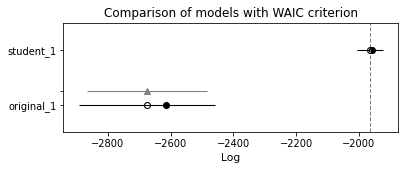

In [7]:
waic_diff = az.compare(compare_dict={"original_1": original1_az, "student_1": student1_az}, ic="waic")
display(waic_diff)

ax = az.plot_compare(waic_diff)
ax.set_title("Comparison of models with WAIC criterion")

Student model is better for predicting new data (smaller elpd values).

#### Comparison with different predictors

In [16]:
model_predictors=CmdStanModel(stan_file='code_5.stan')

predictors_1 = model_predictors.sample(data={"N":N, "K": 1, "y":np.array(data2_pd.iloc[:,3905:]).reshape(N), "X": np.array(data2_pd.iloc[:,2:1302]).reshape(N,1)},
                           seed=26042023)
predictors_2 = model_predictors.sample(data={"N":N, "K": 2, "y":np.array(data2_pd.iloc[:,3905:]).reshape(N), "X": np.array([data2_pd.iloc[:,2:1302], data2_pd.iloc[:,1302:2602]]).reshape(N,2)},
                           seed=26042023)
predictors_3 = model_predictors.sample(data={"N":N, "K": 3, "y":np.array(data2_pd.iloc[:,3905:]).reshape(N), "X": np.array([data2_pd.iloc[:,2:1302], data2_pd.iloc[:,1302:2602], data2_pd.iloc[:,2602:3902]]).reshape(N,3)},
                           seed=26042023)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
one_prediction,0,-2334.447658,2.168677,0.000000,9.976081e-01,25.136437,0.000000,False,log
three_prediction,1,-3024.724270,3.961283,690.276612,2.391858e-03,25.133985,29.261235,False,log
two_prediction,2,-3027.093219,2.925377,692.645561,5.631939e-12,25.051107,29.164274,False,log


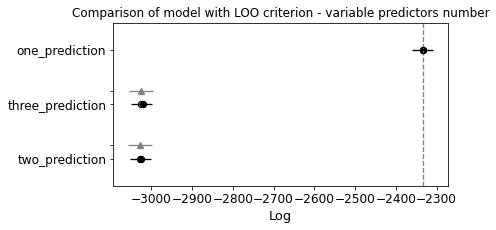

In [18]:
compd_dict = {"one_prediction": az.from_cmdstanpy(posterior=predictors_1), "two_prediction": az.from_cmdstanpy(posterior=predictors_2), "three_prediction": az.from_cmdstanpy(posterior=predictors_3)}
loo_preds = az.compare(compd_dict, ic="loo")

display(loo_preds)

ax = az.plot_compare(loo_preds)
ax.set_title("Comparison of model with LOO criterion - variable predictors number")
plt.show()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
one_prediction,0,-2334.447664,2.168683,0.000000,9.976080e-01,25.136445,0.000000,False,log
three_prediction,1,-3024.724310,3.961323,690.276646,2.392040e-03,25.133985,29.261250,False,log
two_prediction,2,-3027.092936,2.925095,692.645272,5.578871e-12,25.051069,29.164267,False,log


Text(0.5, 1.0, 'Comparison of model with WAIC criterion - variable predictors number')

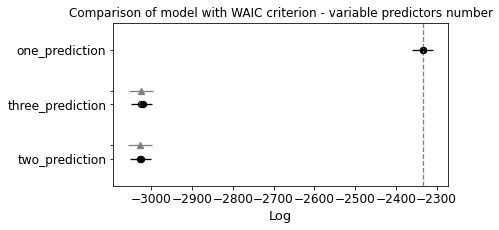

In [19]:
waic_preds = az.compare(compd_dict, ic="waic")

display(waic_preds)

ax = az.plot_compare(waic_preds)
ax.set_title("Comparison of model with WAIC criterion - variable predictors number")
plt.show()

Model gives the best result for one predictor. Results for two or three predictors are very similar.